# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

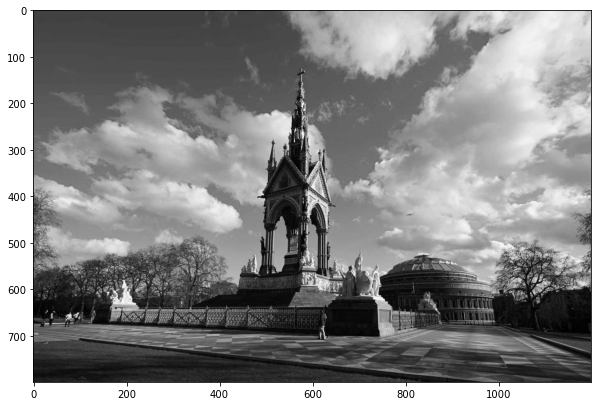

In [2]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

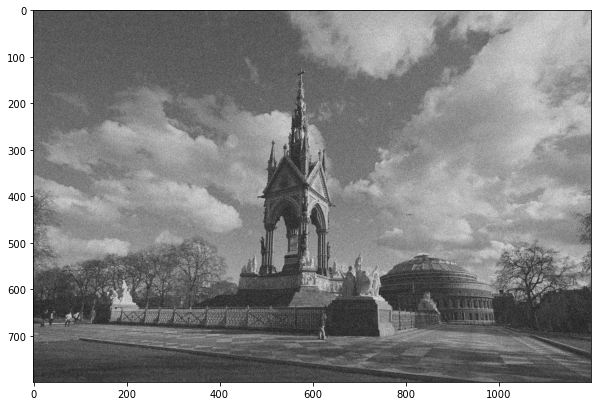

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


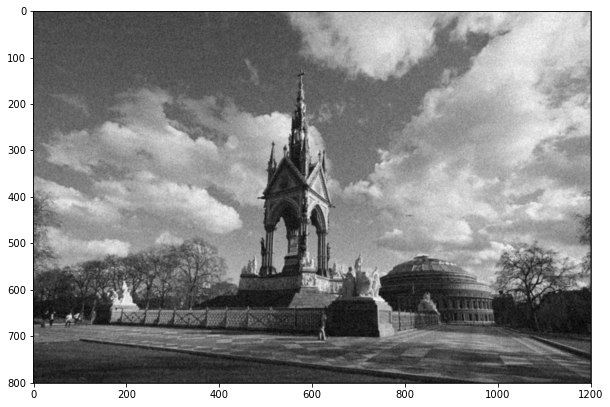

In [4]:
# Design the filter h
h = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


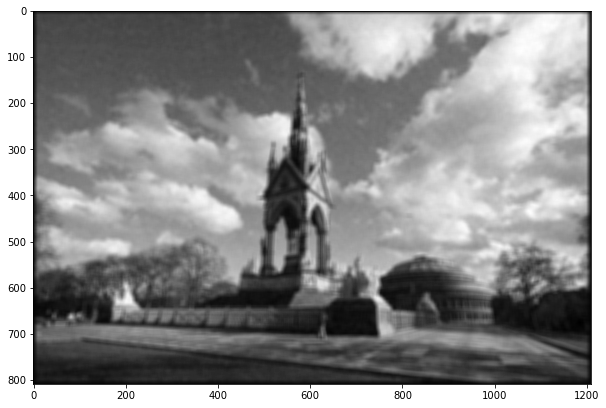

In [5]:
# Design the filter h
h = [[1 for i in range(11)] for i in range (11)]

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

From these results, we see that as the kernel size increases, the sharpness of the image decrease i.e it gets more blurry. This makes sense as each value is being influenced by a larger number of pixels around it, so there should be more overlap for adjacent/nearby pixels.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
prewitt_y:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


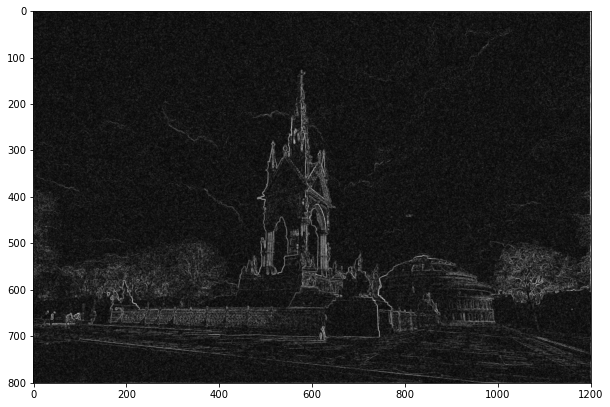

In [6]:
# Design the Prewitt filters
prewitt_x = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
])
prewitt_y = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])

def grad_mag_filter(image):
    # Prewitt filtering
    image_prewitt_x = scipy.signal.convolve2d(image, prewitt_x);
    image_prewitt_y = scipy.signal.convolve2d(image, prewitt_y);
 
    # Calculate the gradient magnitude
    image_prewitt_x_squared = np.square(image_prewitt_x)
    image_prewitt_y_squared = np.square(image_prewitt_y)
    image_prewitt_xy_squared_sum = image_prewitt_x_squared + image_prewitt_y_squared
    return np.sqrt(image_prewitt_xy_squared_sum)
    
grad_mag = grad_mag_filter(image_noisy)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

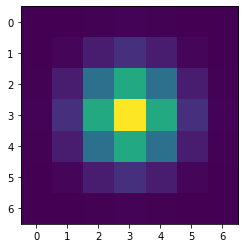

In [7]:
def gaussian_2d(x, y, sigma):
    return (1 / (2 * math.pi * sigma * sigma)) * math.exp(-(x * x + y * y) / (2 * sigma * sigma))

def gaussian_grid_2d(min, max, sigma):
    grid = []
    
    for x in range(min, max + 1):
        col = []
        for y in range(min, max + 1):
            col.append(gaussian_2d(x, y, sigma))
        grid.append(col)
    
    return grid

# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    size = sigma * 3
    h = gaussian_grid_2d(-size, size, sigma)
    return np.array(h)

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 1
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

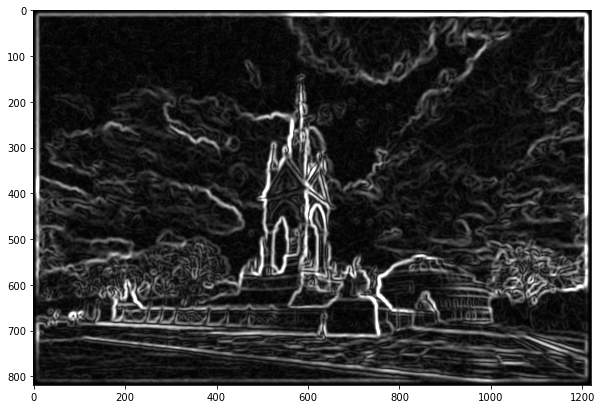

In [8]:
def gaussian_smoothing_filter(image, sigma):
    # Perform Gaussian smoothing before Prewitt filtering
    return scipy.signal.convolve2d(image, gaussian_filter_2d(sigma))

grad_mag = grad_mag_filter(gaussian_smoothing_filter(image_noisy, 3))

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

Time: 2.8451356887817383 seconds


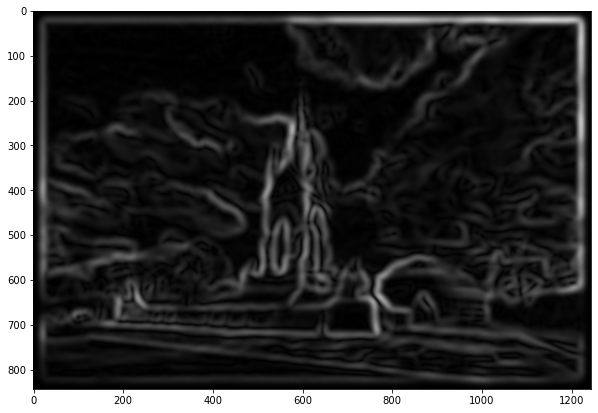

In [9]:
# Construct the Gaussian filter

# Perform Gaussian smoothing and count time
start = time.time()
image_gaussian = gaussian_smoothing_filter(image_noisy, 7)
end = time.time()
print("Time:", end - start, "seconds")

# Calculate the gradient magnitude
grad_mag = grad_mag_filter(image_gaussian)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

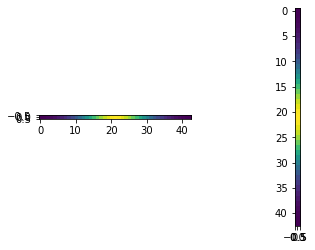

In [10]:
def gaussian_1d(x, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-(x * x) / (2 * sigma * sigma))

def gaussian_line_1d(min, max, sigma):
    line = []
    for i in range(min, max + 1):
        line.append(gaussian_1d(i, sigma))
    return line

# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    size = 3 * sigma
    return np.array([gaussian_line_1d(-size, size, sigma)])

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.transpose(gaussian_filter_1d(sigma))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Time: 0.3050417900085449 seconds
Mean difference: 1.5948516654744359e-25


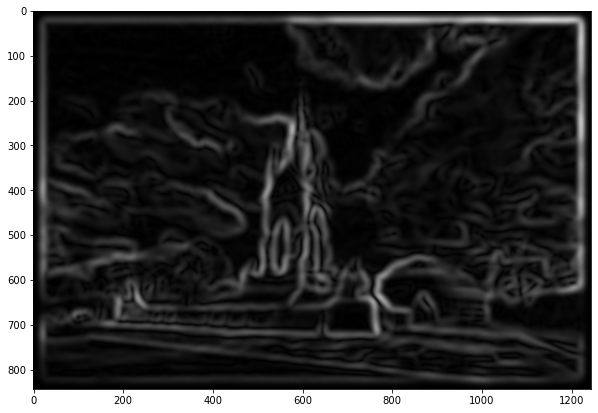

In [11]:
def gaussian_smoothing_filter_separable(image, sigma):
    h_x = gaussian_filter_1d(sigma)
    h_y = np.transpose(gaussian_filter_1d(sigma))
    image_gaussian_x = scipy.signal.convolve2d(image, h_x)
    return scipy.signal.convolve2d(image_gaussian_x, h_y)    

# Perform separable Gaussian smoothing and count time
start = time.time()
image_gaussian = gaussian_smoothing_filter_separable(image_noisy, 7)
end = time.time()
print("Time:", end - start, "seconds")

# Calculate the gradient magnitude
grad_mag2 = grad_mag_filter(image_gaussian)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.

# Using the Mean Squared Error to compare the images
print("Mean difference:", np.mean((grad_mag - grad_mag2) ** 2))

### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

### Results

Prewitt filtering is useful for edge detection, and Gaussian filters are useful for denoising on a small scale, and blurring on a larger scale. Since Prewitt filtering is prone to detecting noise (as shown in 2.1), by denoising it using a Gaussian filter first it can produce a far more useful output (as shown in 2.3). However, if the Gaussian filter's sigma value is too large then information in the image will be lost due to it being blurred (as shown in 2.4 and 2.6).

### Computational Time

| Version | Time |
| --- | --- |
| Normal | 2.881135940551758 |
| Separated | 0.3429868221282959 | 

This shows that the separated version is approximately 8 times faster than the normal version. In the normal version the kernel size grows in n-squared `O(n^2)` relative to sigma, where as in the separated version the kernels grow linearly `O(n)` relative to sigma. As a result, there will be far less calculations to do for each pixel in the separated version, hence why it runs faster.

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [12]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [46]:
# Expand the dimension of the numpy array
image_noisy_expanded = np.expand_dims(image_noisy, axis=(0, 1))
print(image_noisy_expanded.shape)
# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_torch = torch.from_numpy(image_noisy_expanded)


(1, 1, 799, 1200)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [47]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
h = np.expand_dims(h, axis=(0, 1))
print(h.shape)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(1, 1, h.shape)

# Set the kernel weight
conv.weight = torch.nn.Parameter(torch.Tensor(h))


(1, 1, 19, 19)


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

In [48]:
# Filtering
image_filtered = conv(image_noisy_torch)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


RuntimeError: expected scalar type Double but found Float

## 4. Survey: How long does it take you to complete the coursework?